# Base de datos corta

In [3]:
## Paquetes que vamos a usar
import os # Paquete para definir el directorio
import pandas as pd # Paquete para importar y manipular dataframes
import numpy as np # Paquete para hacer operaciones matriciales ultra eficientemente
import seaborn as sns # Paquete para gráficos
import matplotlib.pyplot as plt # Paquete para gráficos
sns.set_style("ticks") # Definimos el estilo de las gráficas. Este me gusta a mi
from sklearn.neighbors import KNeighborsClassifier # Modelo KNN
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test
from sklearn.preprocessing import StandardScaler # Para estandarizar la base
from sklearn import metrics # Metricas para evaluar el modelo
from sklearn.metrics import confusion_matrix # Matriz de confusión
import getpass
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import getpass
import missingno as msno 
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test
from sklearn.decomposition import PCA
# El primer paso siempre será estandarizar nuestras variables
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import plotnine as p9
from sklearn.preprocessing import StandardScaler
# Paso 1. Escalar variables numéricas
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Paso 3. Vamos a imputar con la moda las variables categoricas.
from sklearn.preprocessing import OneHotEncoder
# Paso 4. Dummyficamos las variables categoricas.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import re

In [4]:
df = pd.read_excel("/Users/juank/Desktop/python/Ualet/Base_vinculados_Corregida.xlsx",sheet_name="Base", engine='openpyxl')
df=df.rename(columns={'Adiciones Totales': "AdicionesTotales"})
df

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Genero,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,...,Total_Activos,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,AdicionesTotales,Retiros Totales,Adiciones Promedio,Retiros Promedio
0,2017-08-24,1,Ualet puro,DANIEL,M,1,Valiente,10,Medio,1991-11-12,...,340000000,40000000,0.0,8,6,2,600000.0,594209.73,100000.0,297104.865
1,2017-08-24,2,Ualet puro,JESSICA,F,3,Estratega,112,Alto,1992-05-25,...,0,0,0.0,2,1,1,10000.0,10081.56,10000.0,10081.560
2,2017-08-24,3,Ualet puro,DAVID,M,2,Aventurero,7210,Sin Clasificar,1995-06-22,...,120000000,7000000,0.0,0,0,0,0.0,0.00,0.0,0.000
3,2017-08-24,4,Ualet puro,DIEGO,M,2,Aventurero,1,Alto,1988-05-01,...,100000000,80000000,0.0,0,0,0,0.0,0.00,0.0,0.000
4,2017-08-24,5,Ualet puro,NICOLÁS,M,1,Valiente,1,Alto,1995-05-05,...,0,0,0.0,6,5,1,417000.0,421576.20,83400.0,421576.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31729,2021-03-25,31850,Ualet puro,DIEGO,M,4,Planeador,0,Bajo,2000-03-16,...,0,0,0.0,0,0,0,0.0,0.00,0.0,0.000
31730,2021-03-25,31851,Ualet puro,DIEGO,M,4,Planeador,0,Bajo,1976-05-05,...,0,0,0.0,0,0,0,0.0,0.00,0.0,0.000
31731,2021-03-25,31852,Ualet puro,BRANDON,M,4,Planeador,0,Bajo,1955-03-20,...,0,0,0.0,0,0,0,0.0,0.00,0.0,0.000
31732,2021-03-25,31853,Ualet puro,SANTIAGO,M,4,Planeador,0,Bajo,1991-12-14,...,0,0,0.0,0,0,0,0.0,0.00,0.0,0.000


In [5]:
df["Y"]=np.where(df["AdicionesTotales"]>=400000,1,0)
df

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Genero,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,...,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,AdicionesTotales,Retiros Totales,Adiciones Promedio,Retiros Promedio,Y
0,2017-08-24,1,Ualet puro,DANIEL,M,1,Valiente,10,Medio,1991-11-12,...,40000000,0.0,8,6,2,600000.0,594209.73,100000.0,297104.865,1
1,2017-08-24,2,Ualet puro,JESSICA,F,3,Estratega,112,Alto,1992-05-25,...,0,0.0,2,1,1,10000.0,10081.56,10000.0,10081.560,0
2,2017-08-24,3,Ualet puro,DAVID,M,2,Aventurero,7210,Sin Clasificar,1995-06-22,...,7000000,0.0,0,0,0,0.0,0.00,0.0,0.000,0
3,2017-08-24,4,Ualet puro,DIEGO,M,2,Aventurero,1,Alto,1988-05-01,...,80000000,0.0,0,0,0,0.0,0.00,0.0,0.000,0
4,2017-08-24,5,Ualet puro,NICOLÁS,M,1,Valiente,1,Alto,1995-05-05,...,0,0.0,6,5,1,417000.0,421576.20,83400.0,421576.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31729,2021-03-25,31850,Ualet puro,DIEGO,M,4,Planeador,0,Bajo,2000-03-16,...,0,0.0,0,0,0,0.0,0.00,0.0,0.000,0
31730,2021-03-25,31851,Ualet puro,DIEGO,M,4,Planeador,0,Bajo,1976-05-05,...,0,0.0,0,0,0,0.0,0.00,0.0,0.000,0
31731,2021-03-25,31852,Ualet puro,BRANDON,M,4,Planeador,0,Bajo,1955-03-20,...,0,0.0,0,0,0,0.0,0.00,0.0,0.000,0
31732,2021-03-25,31853,Ualet puro,SANTIAGO,M,4,Planeador,0,Bajo,1991-12-14,...,0,0.0,0,0,0,0.0,0.00,0.0,0.000,0


In [6]:
df.columns

Index(['Fecha Registro', 'Id Modificado', 'Tipo Cliente', 'Primer Nombre',
       'Genero', 'Perfil Riesgo', 'Riesgo', 'Codigo CIIU', 'CIIU',
       'Fecha de Nacimiento', 'Edad', 'Cod_Ciudad_Nac.', 'Ciudad',
       'Cod Dpto.Nacimto.', 'Departamento', 'Cod. Ocupacion ', 'Ocupacion',
       'Ingresos_mensuales', 'Egresos_mensuales', 'Otros_Ing_Mensuales',
       'Total_Activos', 'Total_Pasivos', 'Saldo', 'Transacciones',
       'Transacciones Adiciones', 'Transacciones Retiros', 'AdicionesTotales',
       'Retiros Totales', 'Adiciones Promedio', 'Retiros Promedio', 'Y'],
      dtype='object')

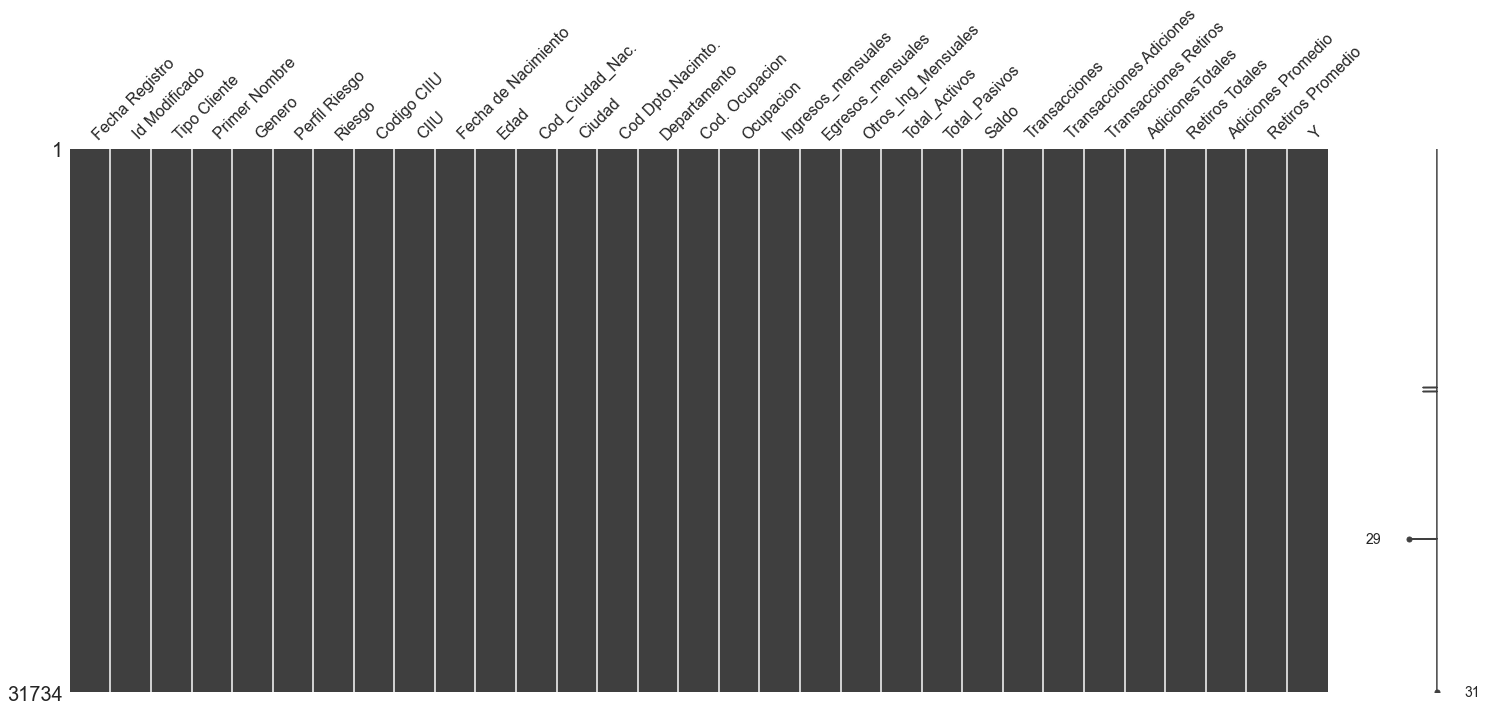

In [7]:
fig=msno.matrix(df) 
fig_copy = fig.get_figure()
fig_copy.savefig('misingUalet.png', bbox_inches = 'tight')

In [8]:
y=df["Y"]
X=df[["Genero","CIIU","Edad","Ingresos_mensuales","Egresos_mensuales","Otros_Ing_Mensuales","Total_Activos","Total_Pasivos","Ocupacion"]]
X = pd.merge(X, pd.get_dummies(X['Genero'], drop_first = True), left_index = True, right_index = True)
X = pd.merge(X, pd.get_dummies(X['CIIU'], drop_first = True), left_index = True, right_index = True)
X = pd.merge(X, pd.get_dummies(X['Ocupacion'], drop_first = True), left_index = True, right_index = True)
X.drop(['Genero', 'CIIU',"Ocupacion"], axis = 1, inplace = True)
feature_list = list(X.columns)

# Oversampling

In [9]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

In [10]:
pd.value_counts(y_sm)/len(y_sm)

0    0.5
1    0.5
Name: Y, dtype: float64

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X_sm, y_sm, test_size= 0.3, random_state = 6, stratify = y_sm)

# SVM

In [18]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5, n_jobs = -1)
svm_model.fit(X_train, y_train)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ["auto", "sqrt"]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 "n_estimators": n_estimators,
 "max_features": max_features,
 "max_depth": max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 300}


In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, max_depth=300, max_features='auto',class_weight='balanced')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
#rfc_cv_score = cross_val_score(rfc, X_t, y, cv=10, scoring='accuracy')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n') 
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

In [ ]:
X_train

,Edad,Ingresos_mensuales,Egresos_mensuales,Otros_Ing_Mensuales,Total_Activos,Total_Pasivos,M,Bajo,Medio,Sin Clasificar,EMPLEADO,ESTUDIANTE,INDEPENDIENTE
17312,33,2254054,1715540,0,18245945,16491890,1,1,0,0,0,0,0
5289,46,1000000,500000,0,10000000,5000000,1,0,1,0,1,0,0
17487,31,5581284,3640742,1510286,90000000,31224284,1,0,1,0,1,0,0
687,29,800000,700000,70000,800000,700000,1,0,0,1,1,0,0
8119,28,1000000,700000,0,1000000,700000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,30,4425706,2787146,2212853,65742935,33722880,1,0,1,0,1,0,0
8118,28,900000,620000,800000,900000,800000,1,0,1,0,1,0,0
2583,26,5000000,400000,1000000,30000000,6000000,1,1,0,0,0,1,0
12671,30,8813344,1469087,2948479,16879786,503434,1,0,0,0,0,0,0


In [15]:
df

,Fecha Registro,Id Modificado,Tipo Cliente,Primer Nombre,Genero,Perfil Riesgo,Riesgo,Codigo CIIU,CIIU,Fecha de Nacimiento,...,Total_Pasivos,Saldo,Transacciones,Transacciones Adiciones,Transacciones Retiros,AdicionesTotales,Retiros Totales,Adiciones Promedio,Retiros Promedio,Y
0,2017-08-24,1,Ualet puro,DANIEL,M,1,Valiente,10,Medio,1991-11-12,...,40000000,0.00,8,6,2,600000.0,594209.73,100000.0,297104.865,1
1,2017-08-24,2,Ualet puro,JESSICA,F,3,Estratega,112,Alto,1992-05-25,...,0,0.00,2,1,1,10000.0,10081.56,10000.0,10081.560,0
2,2017-08-24,3,Ualet puro,DAVID,M,2,Aventurero,7210,Sin Clasificar,1995-06-22,...,7000000,0.00,0,0,0,0.0,0.00,0.0,0.000,0
3,2017-08-24,4,Ualet puro,DIEGO,M,2,Aventurero,1,Alto,1988-05-01,...,80000000,0.00,0,0,0,0.0,0.00,0.0,0.000,0
4,2017-08-24,5,Ualet puro,NICOLÁS,M,1,Valiente,1,Alto,1995-05-05,...,0,0.00,6,5,1,417000.0,421576.20,83400.0,421576.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11572,2021-02-03,29909,Ualet puro,ANDRES,M,2,Aventurero,90,Bajo,1981-01-31,...,40000000,28023681.01,4,2,2,36990000.0,8334599.83,18495000.0,4167299.915,1
11573,2021-02-08,30164,Ualet puro,FERNEY,M,1,Valiente,81,Bajo,1998-09-03,...,300000000,49085033.09,2,2,0,50000000.0,0.00,25000000.0,0.000,1
11574,2021-02-18,30587,Ualet puro,LUCERO,M,2,Aventurero,10,Medio,1992-02-16,...,1,9869808.91,1,1,0,10000000.0,0.00,10000000.0,0.000,1
11575,2021-03-02,31178,Ualet puro,LORENZO,M,1,Valiente,10,Medio,2002-05-08,...,3000000,9912918.01,1,1,0,10000000.0,0.00,10000000.0,0.000,1


In [ ]:
a=!